## Sobel and Prewitt edge detection filters

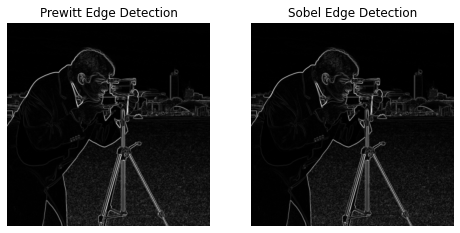

In [1]:
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
image = camera()
edge_prewitt = filters.prewitt(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.show()

In [2]:
pip install skimage

ERROR: Could not find a version that satisfies the requirement skimage (from versions: 0.0)
ERROR: No matching distribution found for skimage


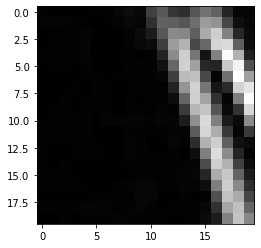

In [3]:
imshow(edge_sobel[150:170, 150:170], cmap='gray')

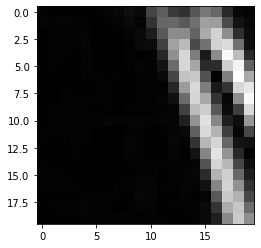

In [4]:
imshow(edge_prewitt[150:170, 150:170], cmap='gray')

(array([1.6000e+01, 9.9000e+01, 6.6100e+02, 2.5000e+03, 6.6030e+03,
        1.2915e+04, 1.7359e+04, 1.6921e+04, 1.1865e+04, 6.4430e+03,
        3.4740e+03, 2.3460e+03, 2.5890e+03, 3.5660e+03, 6.1220e+03,
        1.0432e+04, 1.5829e+04, 1.9986e+04, 1.9462e+04, 1.7590e+04,
        1.7833e+04, 2.1065e+04, 2.0692e+04, 1.4456e+04, 7.2650e+03,
        2.6380e+03, 9.4100e+02, 3.3200e+02, 1.1600e+02, 2.8000e+01]),
 array([-56.38727103, -44.61617918, -32.84508733, -21.07399548,
         -9.30290363,   2.46818821,  14.23928006,  26.01037191,
         37.78146376,  49.55255561,  61.32364746,  73.09473931,
         84.86583115,  96.636923  , 108.40801485, 120.1791067 ,
        131.95019855, 143.7212904 , 155.49238224, 167.26347409,
        179.03456594, 190.80565779, 202.57674964, 214.34784149,
        226.11893334, 237.89002518, 249.66111703, 261.43220888,
        273.20330073, 284.97439258, 296.74548443]),
 <a list of 1 Patch objects>)

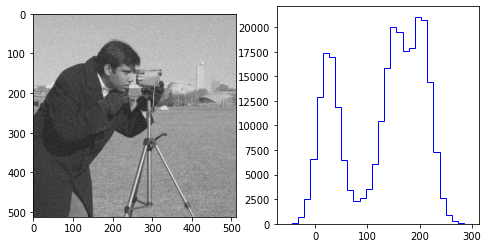

In [5]:
# degrade image by Gaussian noise
noiseSigma = 16.0
image = image + np.random.normal(0, noiseSigma, size=image.shape)

fig, axes = plt.subplots(ncols=2, sharex=False, sharey=False,
                         figsize=(8, 4))

axes[0].imshow(image, cmap='gray')
axes[1].hist(image.ravel(), bins=30, histtype='step', color='b' )

Text(0.5, 1.0, 'Sobel Edge Detection')

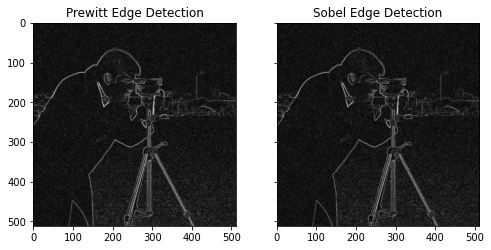

In [6]:
edge_prewitt = filters.prewitt(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')



In [7]:
# Smoothing filter (average)
from skimage.filters import rank
from skimage.morphology import disk
# convert to uint8 type
img_uint8 = image.astype(np.uint8)

(-0.5, 511.5, 511.5, -0.5)

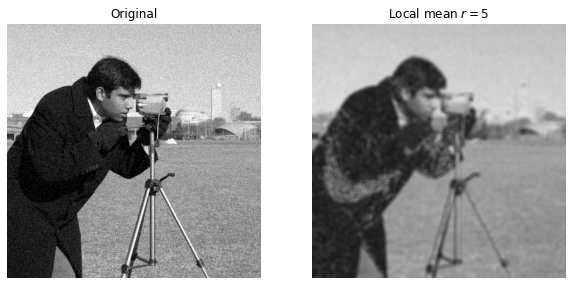

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 7], sharex=True, sharey=True)

loc_mean = rank.mean(img_uint8, disk(5))

ax1.imshow(image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')


ax2.imshow(loc_mean, vmin=0, vmax=255, cmap=plt.cm.gray)
ax2.set_title('Local mean $r=5$')
ax2.axis('off')


### Question 1:
1. Apply Sobel or Prewitt filter to the smoothed_image "local_mean" 
edge_prewitt = filters.prewitt(... ) or edge_sobel = filters.sobel(...)
2. Display a noisy image and a smoothed noisy image filtered by the filter of your choice using the following code

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
axes[0].imshow(..., cmap=plt.cm.gray)
axes[0].set_title('...')
axes[1].imshow(..., cmap=plt.cm.gray)
axes[1].set_title('...')

3. Comment how image smoothing has influenced our ability to detect edges



Text(0.5, 1.0, 'Smoothed Noisy Image')

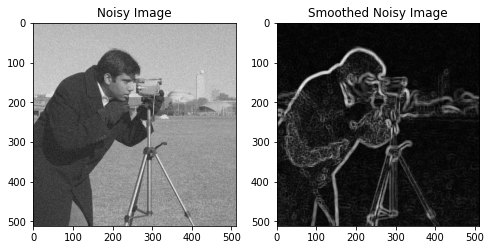

In [15]:
# Leave your answer here

#Q1) 1
edge_prewitt = filters.prewitt(loc_mean)

#Q1) 2
fig, axes = plt.subplots(ncols=2, sharex=False, sharey=False,
                         figsize=(8, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Noisy Image')

axes[1].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[1].set_title('Smoothed Noisy Image')

#Q1) 3
#Image smoothing is able to detect edges but it does not sharply detect the edges.

## Thresholding models

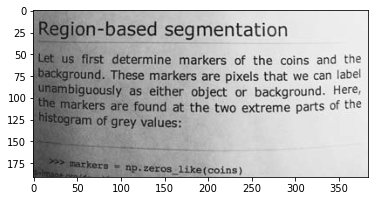

In [17]:
from skimage import data
from skimage.filters import try_all_threshold

img = data.page()
imshow(img, cmap='gray')

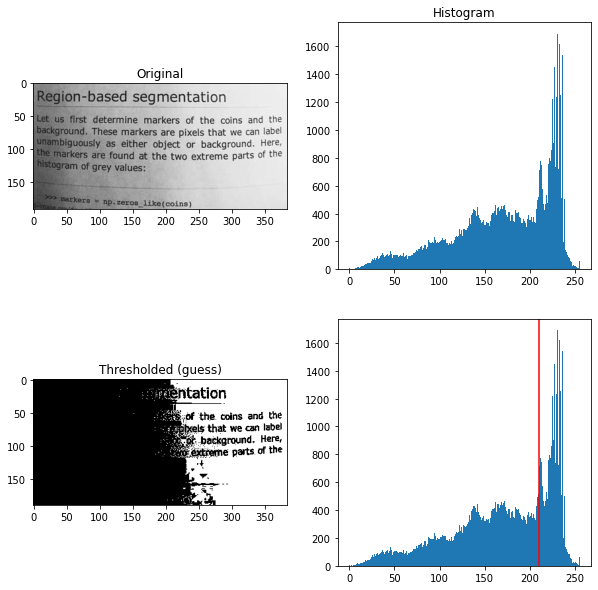

In [18]:
# Let's plot image intensity histogram and see if we can guess the best value of a threshold just by eyeballing
# the histogram distribution. We want to separate blacks from whites.
# Let's guess the threshold value thresh=210
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
thresh=210
binary=img>210
ax[0, 0].imshow(img, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (guess)')

ax[1, 1].hist(img.ravel(), bins=256)
ax[1, 1].axvline(thresh, color='r')

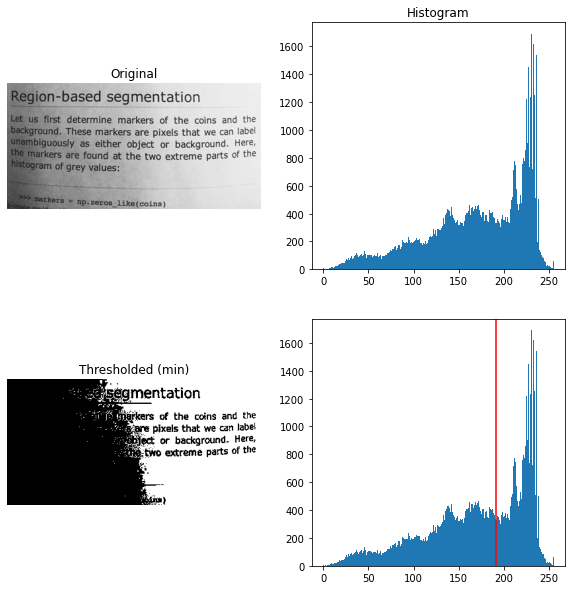

In [19]:
# Bimodal thresholding
from skimage.filters import threshold_minimum
thresh_m = threshold_minimum(img)
binary = img > thresh_m
#imshow(binary, cmap='gray')

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(img, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(img.ravel(), bins=256)
ax[1, 1].axvline(thresh_m, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

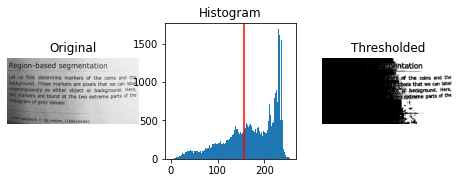

In [20]:
# Otsu's method
from skimage.filters import threshold_otsu

thresh_o = threshold_otsu(img)
binary = img > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh_o, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

###  Question 2: 1. Choose the size of the neighbourhood from where to calculate the local mean and standard deviation of pixerl intensities. For the size that you have chosen, how many adaptive threshold values have you obtained?  What is the difference between local and global thresholding approaches?  
### 2. Vary the size of the neighbourhood, for example, from 5 until 101, and observe the effect of the size on quality of the segmented image. Does the size of the neighbourhood matter at all? Which size have you found to be optimal (using your inspection)   

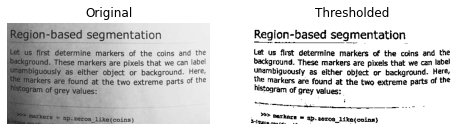

In [28]:
from skimage.filters import threshold_local
global_thresh = thresh_o

block_size = 57
adaptive_thresh = threshold_local(img, block_size, offset=10)
binary_adaptive = img > adaptive_thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(binary_adaptive, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

plt.show()


In [27]:
#Q2 1)
#size of the neighbourhood = 57
#Number of adaptive threshold values = 1286
#Difference between local and global thresholding approaches =  
#     A global threshold for all pixels, adaptive thresholding changes the threshold dynamically over the image. 
#     Adaptive thresholding is sophisticated version of thresholding can accommodate changing lighting conditions in the image, 
#     e.g. those occurring as a result of a strong illumination gradient or shadows.

## block_size = ??? is optimal


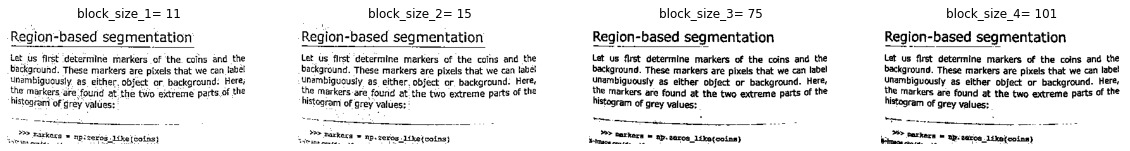

In [39]:
from skimage.filters import threshold_local
global_thresh = thresh_o

block_size_list = [11, 15, 75, 101]

fig, axes = plt.subplots(ncols=4, figsize=(20, 10))
ax = axes.ravel()

for i in range(4):
  adaptive_thresh = threshold_local(img, block_size_list[i], offset=10)
  binary_adaptive = img > adaptive_thresh

  ax[i] = plt.subplot(1, 4, i+1)
  ax[i].imshow(binary_adaptive, cmap=plt.cm.gray)
  ax[i].set_title('block_size_'+ str(i+1) +'= ' + str(block_size_list[i]))
  ax[i].axis('off')

plt.show()

In [40]:
# Yes. The size of the neighborhood matters. But it does not matter at all. When we look at the results we can understand it. 
# According to the result block size, 11-15 has more same result. As well block-size 75-101 has more same result.
# Optimal Block Size = 75